In [1]:
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import dalmatian

import pandas as pd

import scrublet as scr

sc.set_figure_params(dpi=120)
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

from scipy.stats import ttest_ind

from ggsc.composition import *


In [2]:
response_palette = {'R':'teal','NR':[1,.2,0]}


In [3]:
adata = sc.read("../data/IP_specific_clustering.h5ad")
adata_mda = sc.read("../data/green_data_harmony.h5ad")

In [4]:
adata_mda.obs['CAR']=np.array(adata_mda.raw[:,'FMC63-CD19SCFV'].X.todense()).reshape(-1)>0
adata_mda.obs = adata_mda.obs.join(pd.read_csv('gs://ibm-cart-0/analysis/may2021/mda/knn_genes.txt',index_col=0))
adata_mda.obs['Treg'] = adata_mda.obs['knnFOXP3']>=1

In [5]:
min_cells=100

In [13]:
response_colors = {'R':sns.color_palette()[0],'NR':sns.color_palette()[1]}
markers = {'R':'^','NR':'X'}

df = estimate_cell_frequencies(adata[adata.obs['CAR']],'cell_type')
df = df[df['cell_type']=='T-reg']
df = df[df['N']>=min_cells]
df['response'] = df['barcode'].str.extract('-(R|N)-')
df['response'] = df['response'].map({'N':'NR','R':'R'})
df['product'] = df['barcode'].str.extract('(Tisa|Axi)-') + '-cel'
df['response'] = pd.Categorical(df['response'],categories=['R','NR'])

df['frac'] = df['n']/df['N']

In [21]:
dfm = estimate_cell_frequencies(adata_mda[adata_mda.obs['CAR']],'Treg')
dfm = dfm[dfm['Treg']]
dfm = dfm[dfm['N']>=min_cells]
dfm['response'] = dfm['barcode'].str.extract('(CR|PD)-')
dfm['response'] = dfm['response'].map({'CR':'R','PD':'NR'})

dfm['frac'] = dfm['n']/dfm['N']

dfm['product'] = 'Axi-cel'
dfm['product'] = pd.Categorical(dfm['product'],categories=['Axi-cel','Tisa-cel'])

In [22]:
dfm = dfm[~dfm['response'].isna()]

In [25]:
dfm

,Treg,barcode,n,N,est,lb,ub,response,frac,product
1,True,CR-ac01,112,1744,0.064270,0.053246,0.076240,R,0.064220,Axi-cel
3,True,CR-ac05,28,580,0.048432,0.032502,0.067303,R,0.048276,Axi-cel
5,True,CR-ac07,51,685,0.074577,0.056128,0.095375,R,0.074453,Axi-cel
7,True,CR-ac08,72,960,0.075089,0.059285,0.092567,R,0.075000,Axi-cel
9,True,CR-ac09,52,883,0.058990,0.044431,0.075439,R,0.058890,Axi-cel
11,True,CR-ac10,182,2504,0.072718,0.062877,0.083205,R,0.072684,Axi-cel
13,True,CR-ac12,21,467,0.045163,0.028267,0.065736,R,0.044968,Axi-cel
15,True,CR-ac14,194,2588,0.074994,0.065165,0.085446,R,0.074961,Axi-cel
17,True,CR-ac16,74,718,0.103175,0.082014,0.126427,R,0.103064,Axi-cel
21,True,PD-ac02,118,1754,0.067324,0.056077,0.079506,NR,0.067275,Axi-cel


In [16]:
df['product'] = pd.Categorical(df['product'],categories=['Axi-cel','Tisa-cel'])
df['response'] = pd.Categorical(df['response'],categories=['R','NR'])

In [27]:
dfm['response'] = pd.Categorical(dfm['response'],categories=['R','NR'])


/home/njharlen/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1172: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/home/njharlen/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1172: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/home/njharlen/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1172: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/home/njharlen/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1172: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hu

(-0.005, 0.1)

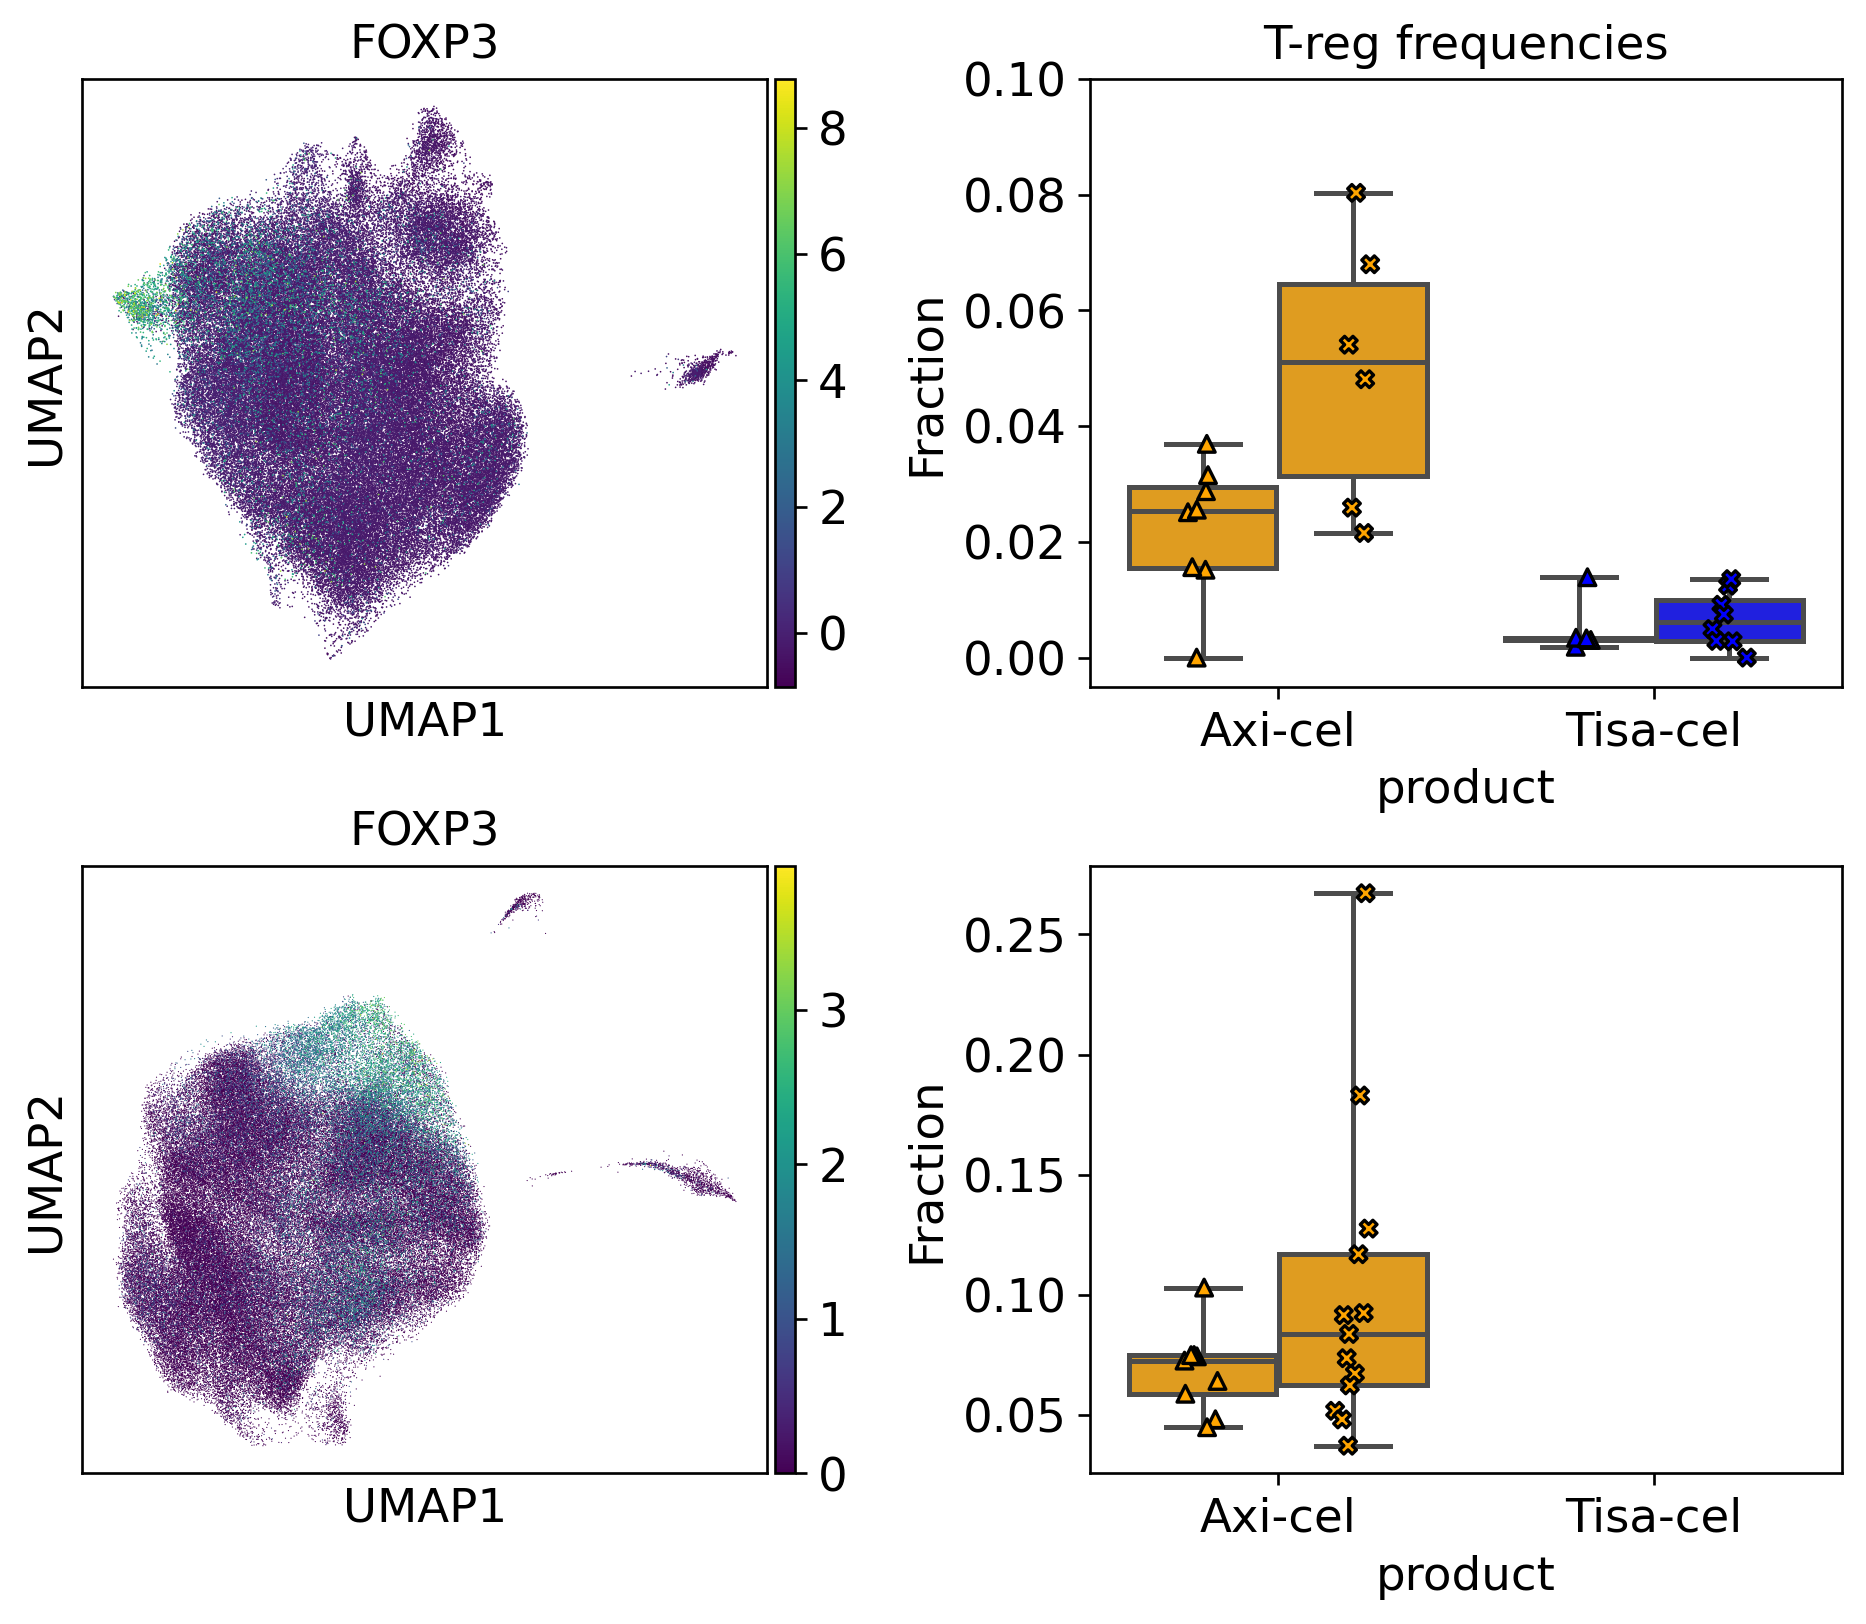

In [29]:
f,ax = plt.subplots(2,2,figsize=(8,7))
sc.pl.umap(adata,color='FOXP3',show=False,ax=ax[0,0],size=1)
sc.pl.umap(adata_mda,color='FOXP3',show=False,ax=ax[1,0],size=.5)

markers = {'R':'^','NR':'X'}
colors = {'Tisa-cel':'blue','Axi-cel':'orange'}

for (product,response),g in df.groupby(['product','response']):
    palette = {'R':colors[product],'NR':colors[product]}
    sns.boxplot(x="product",
                  hue="response",y="frac",data=g,dodge=True,
                ax=ax[0,1],palette=palette,whis=100)
    sns.stripplot(x="product",marker=markers[response],
                  hue="response",y="frac",data=g,dodge=True,
                  ax=ax[0,1],palette=palette,edgecolor='k',linewidth=1)
ax[0,1].get_legend().remove()
ax[0,1].grid(False)
ax[0,1].set_ylabel('Fraction')


for response,g in dfm.groupby('response'):
    sns.stripplot(x="product",hue='response',y="frac",data=g,dodge=True,color='k',ax=ax[1,1],
              palette={'R':'orange','NR':'orange'},marker=markers[response],edgecolor='k',linewidth=1)
    sns.boxplot(x="product",hue='response',y="frac",data=dfm,dodge=True,
            ax=ax[1,1],whis=100,palette = {'R':'orange','NR':'orange'})
plt.ylabel('Fraction')
plt.grid(False)
plt.tight_layout()
ax[1,1].get_legend().remove()

ax[0,1].set_title('T-reg frequencies')

ax[0,1].set_ylim([-.005,.1])

In [24]:
df.groupby('product').apply(lambda x : ttest_ind(x.loc[x['response']=='R','frac'],
                                                      x.loc[x['response']=='NR','frac']))

product
Axi-cel     (-2.9180664559051985, 0.012886524671680803)
Tisa-cel       (-0.5529424080871201, 0.591362564123412)
dtype: object